# LAB 5: Some physics,...may be?

### <font color='red'> Read, solve and answer each question fully (with brief but complete explanations). Also, label all the features in your graphs appropriately!</font>

In [98]:
import numpy as np, matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import integrate
from scipy.integrate import odeint, cumtrapz

###### 1. (a) Define a function (or expression) that gives you the electric potential for two charges of opposite signs, a positive charge q = +1 at x = 0.5 and a negative charge q = -1 at x = -0.5. (For simplicity, set $1/(4 \pi \epsilon_0)$ equal to 1)

(b) Define the components of the electric field as the negative derivatives of the potential. Considering just the x-y plane (set z = 0) and create a vector plot of the field, and a streamplot of the field lines. 

(c) Make a contour plot of the electric potential in the xy plane, and try to plot it on the same graph as the streamplot. You should be able to verify that the electric field lines are always perpendicular to the equipotential contours (as you may have learned).

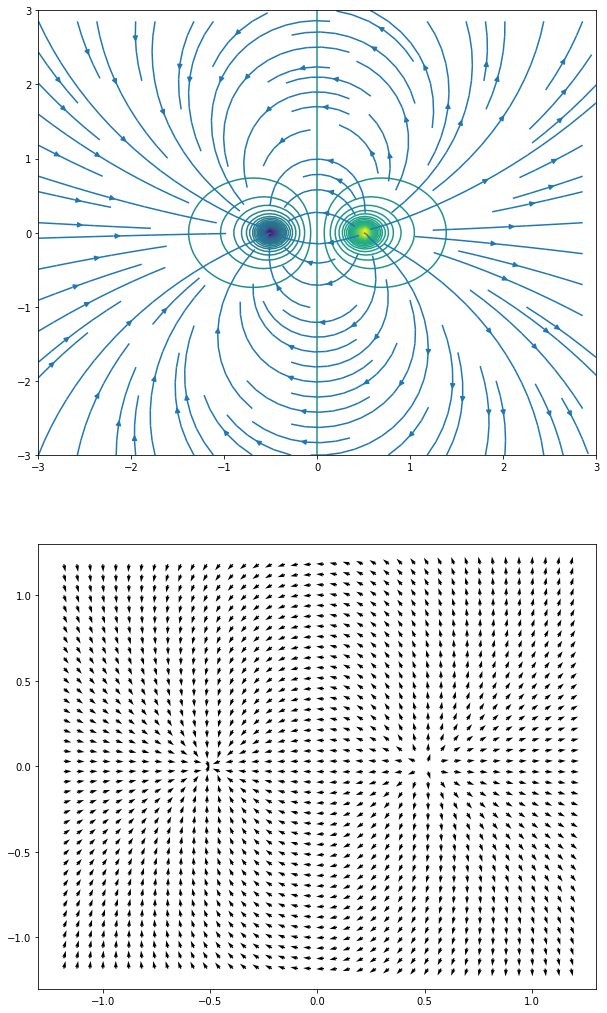

In [99]:
#QUESTION 1 SOLUTIONS
#Part (a)
x_vals = np.linspace(-3, 3, 100)
y_vals = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x_vals, y_vals)

def point_potential(charge1, charge2):
    '''
    charge1 = (charge1_magnitude, charge1_position)
    charge2 = (charge2_magnitude, charge2_position)
    '''
    potential = 1 * (charge1[0]/(np.sqrt((X - charge1[1])**2 + Y**2)) + charge2[0]/(np.sqrt((X - charge2[1])**2 + Y**2)))
    return potential

#Parts (b) and (c)
V = point_potential((1, 0.5), (-1, -0.5))

fig, ax = plt.subplots(2, 1, figsize=((10,18)))
ax[0].contour(X, Y, V, 100)

dy, dx = np.gradient(-V, 2)
N = np.sqrt(dx**2 + dy**2)
DX, DY = (dx/N)*5, (dy/N)*5

ax[1].quiver(X[30:70, 30:70], Y[30:70, 30:70], DX[30:70, 30:70], DY[30:70, 30:70])
ax[0].streamplot(X, Y, dx, dy)
plt.show()

###### 2. The magnetic field produced at position (x,y) by a current flowing in a very long, straight wire on the z-axis is given by this equation:  

\begin{equation}
{\bf B}=\left( \frac{\mu_0 I}{2\pi} \right) \frac{-y {\hat x}+ x \hat y}{x^2+y^2} 
\end{equation}

Here $I$ is the current (in amps) and $\mu_0$ is a fundamental constant but for our purposes you can set the stuff inside the parentheses equal to 1. Use a 3D vector plot to visualize this field over the range from -1 to +1 in all three directions. Hint: use the given unit vectors to break $\bf B$ into $B_x$, $B_y$, and $B_z$ components ($B_z=0$). 

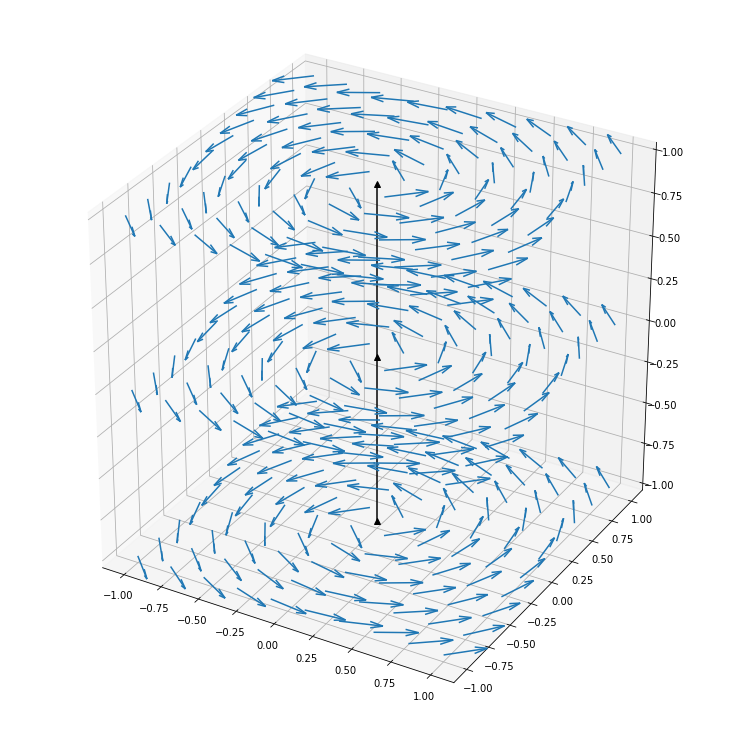

In [100]:
#QUESTION 2 SOLUTIONS
x = np.linspace(-1, 1, 10)
y = np.linspace(-1, 1, 10)
z = np.linspace(-1, 1, 3)
X, Y, Z = np.meshgrid(x, y, z)

x0 = np.zeros(3)
y0 = np.zeros(3)

Bx = -Y/(X**2 + Y**2)
By = X/(X**2 + Y**2)
Bz = 0

ax = Axes3D(plt.figure(figsize=(10,10)))
ax.plot(x0, y0, z, 'k^-')
ax.quiver(X, Y, Z, Bx, By, Bz, normalize = 'true', length = 0.25)
plt.show()

###### 3. Consider a uniformly-charged hollow spherical shell of radius $R$ and total charge $Q$. The charge per area is a constant $\sigma = Q/(4 \pi R^2)$. We want to find the electric potential at an arbitrary point (x,y,z) due to this shell. Due to symmetry, this problem can actually be solved quite quickly through application of Gauss's Law, but we want to do it through direct integration of the infinitesimal contribution to the electric potential $V$ from each tiny amount of charge.  That is, each tiny bit of charge on the shell $dQ$ (having tiny amount of charge $\sigma dA$ makes a small contribution to the electric potential at (x,y,z): $dV=k dQ/distance$, where the denominator is the distance from the tiny charge to the point (x,y,z). If you add up all of the small contributions (integrate), you should obtain the total V(x,y,z). 

We can simplify things a bit by noticing that due to symmetry the potential at (x,y,z) will be the same for all points that are at the same distance away, $r$. Thus the total potential at (x,y,z) is

\begin{equation}
V(r)=\int{\frac{k \sigma dA}{\sqrt{R^2+r^2-2 R r cos \theta}}}
\end{equation}

In spherical coordinates,  $dA = R^2 sin \theta d\theta d\phi$, and the integral goes from 0 to 2$\pi$ in $\phi$ and from 0 to $\pi$ in $\theta$.

(a) Perform the integral to get the potential as a function of r.  

(b) Now use variable replacement to evaluate your potential for the simple case where ${k=1, Q=1, R=1}$.  Plot the resulting expression (which should depend only on r) over the range $r=[0, 5]$.  Try to explain this rather surprising result to your partner.  How and why did this cancellation occur? (Incidentally, since gravity is also an inverse square law and since field is essentially the derivative of the potential, your result should prove that if the earth were a hollow sphere, there would be no gravitational field on the inside.)

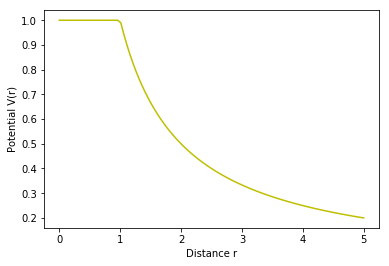

When r < R (R=1 for this case), the potential is constant. When r > R, the potential decreases (inverse square law).


In [101]:
#QUESTION 3 SOLUTIONS
#Parts (a) and (b)
def potential(phi, theta, k, Q, R, r):
    my_potential = (Q/(4*np.pi*R**2))*(k/(np.sqrt((R**2)+(r**2)-2*R*r*np.cos(theta))))*(R**2)*np.sin(theta)
    return my_potential

r_values = np.linspace(0, 5, 100)
v_values = list()

for i in r_values:
    result = integrate.dblquad(potential, 0, np.pi, lambda phi: 0, lambda phi: 2*np.pi, args=(1,1,1,i))
    v_values.append(result)
v_values = np.asarray(v_values)
plt.plot(r_values, v_values[:,0],"y") 
plt.xlabel("Distance r")
plt.ylabel("Potential V(r)")
plt.show()
print("When r < R (R=1 for this case), the potential is constant. When r > R, the potential decreases (inverse square law).")

###### 4. A man throws a pebble straight up. Its height y(t) satisfies the differential equation $y''+\gamma y'=-g$, where g is the acceleration of gravity and $\gamma$ is the damping rate due to frictional drag with the air. 
(a) Find the position, velocity and acceleration of the pebble as a function of time for the case where the initial speed is 6 m/s, y(0) = 0, and  $\gamma= 0.2 s^{-1}$ . Plot all the functions vs. time. 

(b) How and why do these results differ from those of the zero-resistance case? Make a plot comparing the solutions.

(c) Find the time when the pebble returns to the ground (this may require a numerical solution of an algebraic equation) and its velocity upon arrival.

(d) Determine how high the ball will go before it falls back down to the ground

The time when the pebble returns to the ground is 1.17 seconds
The velocity when the pebble returns to the ground is 0.57 meters per second
The pebble will reach a maximum height of 1.699 meters


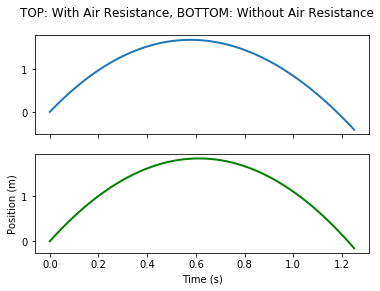

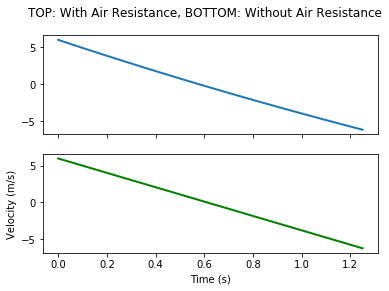

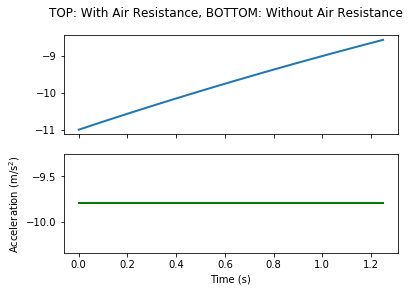

In [102]:
#QUESTION 4 SOLUTIONS
#Parts (a) and (b)
def F(y, t):
    """
    Return derivatives for second-order ODE y'' + 0.2*y' = -g.
    This is for the position of a thrown pebble as a function of time, with air resistance.
    """
    dy = [0, 0]
    dy[0] = y[1] 
    dy[1] = -9.8 - 0.2*y[1]
    return dy

def G(y, t):
    """
    Return derivatives for second-order ODE y'' = -g. 
    This is for the position of a thrown pebble as a function of time, without air resistance.
    """
    dy = [0, 0]
    dy[0] = y[1] 
    dy[1] = -9.8
    return dy

t_min = 0; t_max = 1.25; dt = 0.01
t = np.arange(t_min, t_max+dt, dt)
y0 = [0,6]

#Position vs. time plots
result = odeint(F, y0, t)
result2 = odeint(G, y0, t)
f, position = plt.subplots(2, sharex=True)
f.suptitle('TOP: With Air Resistance, BOTTOM: Without Air Resistance')
position[0].plot(t, result[:, 0], linewidth=2)
position[1].plot(t, result2[:, 0], 'g', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

#Velocity vs. time plots
f, velocity = plt.subplots(2, sharex=True)
f.suptitle('TOP: With Air Resistance, BOTTOM: Without Air Resistance')
velocity[0].plot(t, result[:, 1], linewidth=2)
velocity[1].plot(t, result2[:, 1], 'g', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')

#Acceleration vs. time plots
acceleration = -9.8 - 0.2*result[:, 1]
acceleration2 = -9.8 - 0*result2[:, 1]
f, accel = plt.subplots(2, sharex=True)
f.suptitle('TOP: With Air Resistance, BOTTOM: Without Air Resistance')
accel[0].plot(t, acceleration, linewidth=2)
accel[1].plot(t, acceleration2, 'g', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s$^2$)')

#Part (c)
all_positions = result[:, 0]
pos_t = t[all_positions > 0]
print("The time when the pebble returns to the ground is", pos_t[-1], "seconds")

all_velocities = result[:, 1]
pos_v = t[all_velocities > 0]
print("The velocity when the pebble returns to the ground is", round(pos_v[-1], 2), "meters per second")

#Part (d)
print("The pebble will reach a maximum height of", round(max(all_positions), 3), "meters")

###### 5. The Damped Oscillator: Revisiting the harmonic oscillator again, we'll raise the complexity a bit by adding linear damping (friction): $z''= - \omega_0^2 z-2 \gamma z'$

where the damping factor $\gamma$ describes the amount of damping.

(a) As you may recall, the solution is a function of $\sqrt{\gamma^2-\omega_0^2}$. Identify the presence of three different types of solutions (oscillatory vs non-oscillatory) depending on the relative magnitude of the damping with respect to to the natural frequency.

(b) Solve the ODE with z(0) = 1 and z'(0) = 0. Pick a natural frequency $\omega_0=2 \pi$ (what's the period?), and use $\gamma= 10$. Plot the solution from t = 0 to t = 2 and note the overdamped behavior.

(c) Use the same parameters as in (b), except change the damping to $\gamma= 0.025$. Plot the solution again from t = 0 to t = 50 to see what happens. Use your words to describe and explain what you see!

(d) Use the same parameters as in (c), except change $\gamma$ so the system is critically damped. The plot will look just like overdamping with no hint that you are right on the border between damping and oscillation. To verify that you are right on the border decrease $\gamma$ by 2% and make the plot again. Window the graph down enough that you can see that y(t) goes a little bit negative, indicating that oscillation has begun. You will have to do some serious windowing to see this effect.

Under damping ~ When the damping constant is less than the natural frequency.
Critical damping ~ When the damping constant equals the natural frequency.
Over damping ~ When the damping constant is greater than the natural frequency.


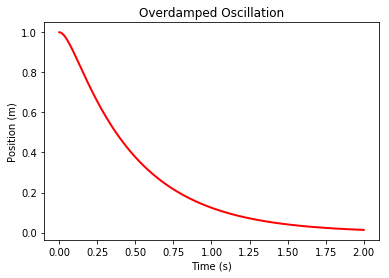

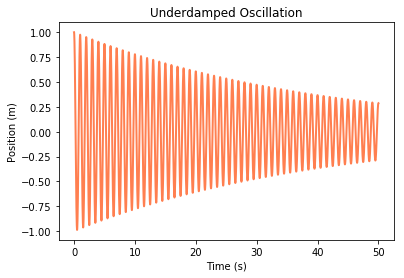

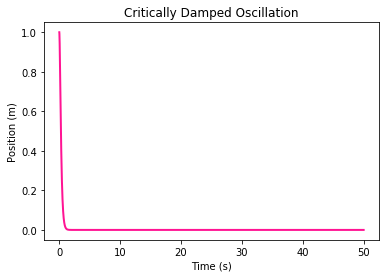

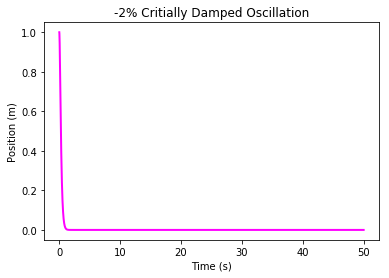

When gamma = 0.025, the oscillations are underdamped so they slowly decrease in amplitude by a small amount each time.
Explanation ~
The first graph shows overdamping, where there are effectively no oscillations.
The second graph shows underdamping, where there are significant oscillations due to the lack of a resistive force to this motion.
The third graph shows critical damping, leveling off at zero.
The fourth graph shows a two-percent decrease from critical damping, where the line dips below zero before leveling off at zero again.
NOTE: This dip below zero is much more obvious if you decrease the damping factor by more than 2%.


In [103]:
#QUESTION 5 SOLUTIONS
#Part (a)
print("Under damping ~ When the damping constant is less than the natural frequency.")
print("Critical damping ~ When the damping constant equals the natural frequency.")
print("Over damping ~ When the damping constant is greater than the natural frequency.")

#Part (b)
def HO(z, t, w, d):
    """
    Return derivatives for second-order ODE z'' = -(w**2)*z - 2*d*z'.
    This is for a harmonic oscillator with damping.
    """
    dz = [0, 0]
    dz[0] = z[1] 
    dz[1] = -(w**2)*z[0] - 2*d*z[1]
    return dz

t_min = 0; t_max = 2; dt = 0.01
t = np.arange(t_min, t_max+dt, dt)
z0 = [1, 0]
w = 2 * np.pi; d = 10 #The period T = 2*pi/w = 1 for this case
solution = odeint(HO, z0, t, args=(w, d))
plt.plot(t, solution[:, 0], 'r', linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.title("Overdamped Oscillation")
plt.show()

#Part (b)
t_min2 = 0; t_max2 = 50; dt2 = 0.01
t2 = np.arange(t_min2, t_max2+dt2, dt2)
w2 = 2 * np.pi; d2 = 0.025
solution2 = odeint(HO, z0, t2, args=(w2, d2))
plt.plot(t2, solution2[:, 0], 'coral', linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.title("Underdamped Oscillation")
plt.show()

#Part (c)
t_min3 = 0; t_max3 = 50; dt3 = 0.01
t3 = np.arange(t_min3, t_max3+dt3, dt3)
w3 = 2 * np.pi; d3 = 2 * np.pi
solution3 = odeint(HO, z0, t3, args=(w3, d3))
plt.plot(t3, solution3[:, 0], 'deeppink', linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.title("Critically Damped Oscillation")
plt.show()

#Part (d)
t_min4 = 0; t_max4 = 50; dt4 = 0.01
t4 = np.arange(t_min4, t_max4+dt4, dt4)
w4 = 2 * np.pi; d4 = 2 * np.pi * 0.98
solution4 = odeint(HO, z0, t4, args=(w4, d4))
plt.plot(t4, solution4[:, 0], 'magenta', linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.title("-2% Critially Damped Oscillation")
plt.show()

print('When gamma = 0.025, the oscillations are underdamped so they slowly decrease in amplitude by a small amount each time.')

#Explanation
print("Explanation ~")
print("The first graph shows overdamping, where there are effectively no oscillations.")
print("The second graph shows underdamping, where there are significant oscillations due to the lack of a resistive force to this motion.")
print("The third graph shows critical damping, leveling off at zero.")
print("The fourth graph shows a two-percent decrease from critical damping, where the line dips below zero before leveling off at zero again.")
print("NOTE: This dip below zero is much more obvious if you decrease the damping factor by more than 2%.")

###### 6. The Driven, Damped Oscillator: If we add a sinusoidal driving force at a frequency $\omega$ to the damped harmonic oscillator, the equation of motion becomes $z''= - \omega_0^2 z-2 \gamma z'+F_0 sin (\omega t)$.

Now we have two frequencies in play - the driving frequency $\omega$ and the damped-oscillator frequency $\omega_d$. The typical behavior of the driven- damped harmonic oscillator starting from rest is as follows: an initial period of start-up with some beating between the two frequencies, then the oscillations at $\omega_d$ damp out and the system transitions to a state of oscillation at the driving frequency $\omega$.

(a) Solve this ODE and plot the solution from t = 0 to t = 300 with $\omega_0 = 1$, $F_0 =1$, $\omega= 1.1$, and $\gamma= 0.01$. Start from rest, with z(0) = 0 and z'(0) = 0. Note the initial beating between frequencies and verify graphically that the final oscillation frequency of z(t) is $\omega$.

(b) Resonance: When you push someone in a swing, you find that if you drive the system at the right frequency, you can get large amplitude oscillations. This phenomenon is an example of resonance, and the frequency at which the system has the maximum response is called the resonance frequency $\omega_R$. If you drive the system at a frequency far from $\omega_R$ you only get small oscillations.

Study resonance in the damped-driven oscillator by making plots of z(t) vs. t with z(0)=0 and z'(0)=0. Use $F_0=1$, $\gamma=0.05$, and $\omega_0=1$ and drive it with three frequencies: $\omega = 0.7$, $\omega = 1$, and $\omega = 1.3$. For each driving frequency, find the steady-state oscillation amplitude A (i.e. the amplitude of oscillation after all the beating has died out) and calculate $\omega_d$. Write down $\omega_d$ and A in a table. Your amplitude numbers don't need to be really precise; we are just looking for general trends here.

IMPORTANT NOTE: In this problem the steady-state oscillation amplitude gets bigger as the driving frequency gets in the neighborhood of $\omega_d$. This may lead you to believe that the resonance frequency $\omega_R$ is the same as the damped frequency $\omega_d$; but they aren't. When damping is small, $\omega_R$ and $\omega_d$ are close, but they are not the same. To calculate $\omega_R$ we need to do some more work (after some paper and pencil, you can calculate the amplitude of the steady-state oscillation as a function of $\omega$, A($\omega$), called resonance curve. The maximum of this function happens at $\omega_R=\sqrt{\omega_d^2-\gamma^2}=\sqrt{\omega_0^2-2\gamma^2}$

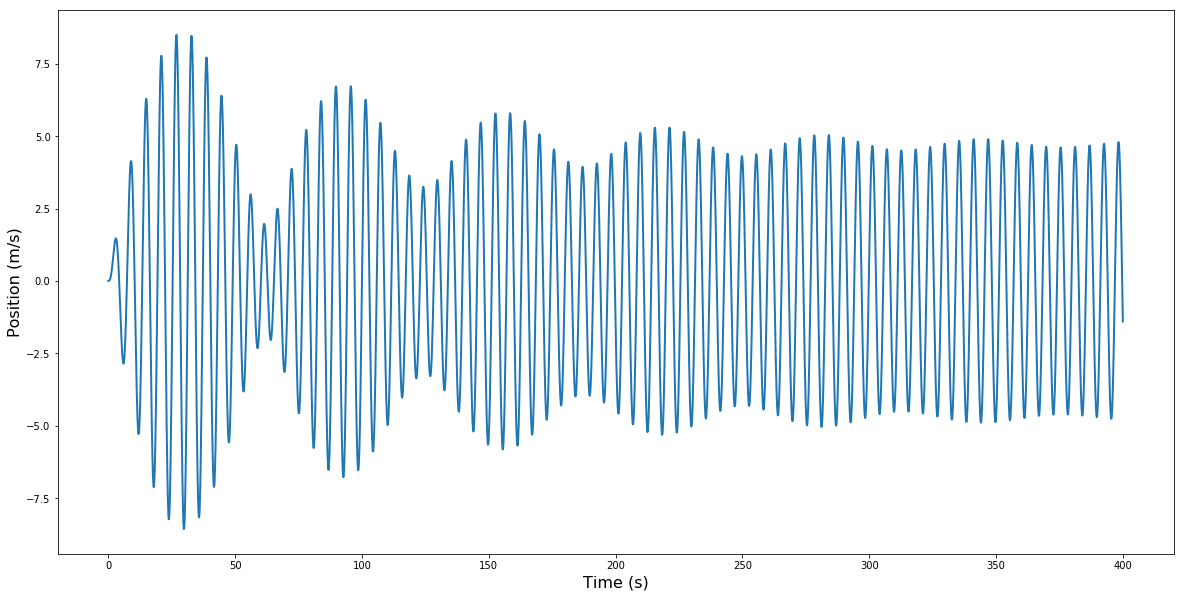

The final oscllation frequency for the above graph is omega = 1.1




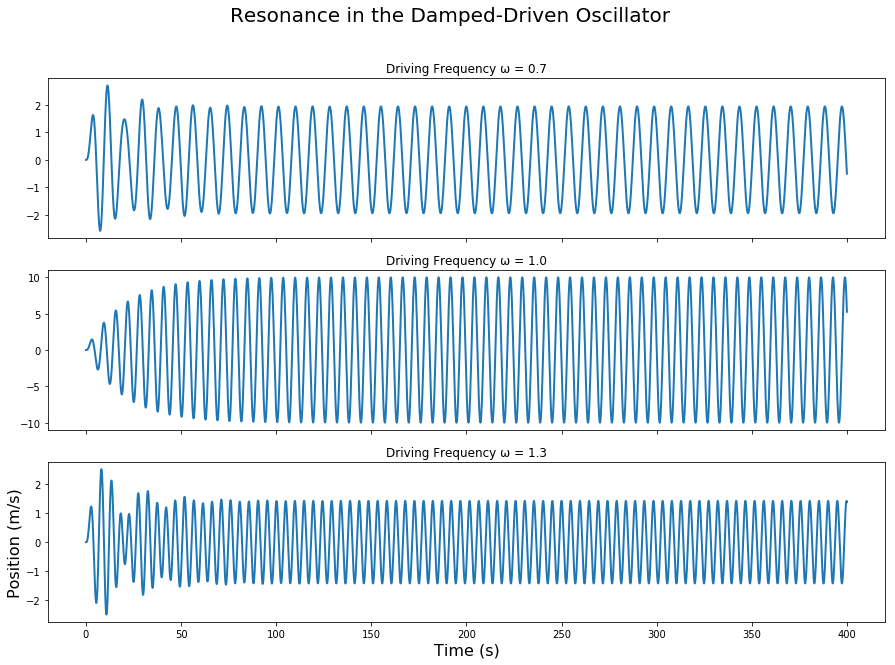

Table:
ω          A           ω_d
-----------------------------
0.7        1.75        1.005
1.0        9.50        1.005
1.3        1.25        1.005


In [104]:
#QUESTION 6 SOLUTIONS
#Part (a)
def DDO(z, t, w_0, gamma, F_0, w):
    """
    Return derivatives for second-order ODE z'' = -(w_0**2)*z - 2*gamma*z' + F_0*sin(w*t).
    This is for a driven, damped oscillator.
    """
    dz = [0, 0]
    dz[0] = z[1] 
    dz[1] = -(w_0**2)*z[0] - 2*gamma*z[1] + F_0*np.sin(w*t)
    return dz

t_min = 0; t_max = 400; dt = 0.1
t = np.arange(t_min, t_max+dt, dt)
z0 = [0, 0]
w_0 = 1; gamma = 0.01; F_0 = 1; w = 1.1

solution = odeint(DDO, z0, t, args=(w_0, gamma, F_0, w))
plt.figure(figsize=(20,10))
plt.plot(t, solution[:, 0], linewidth=2)
plt.xlabel("Time (s)", fontsize=16); plt.ylabel("Position (m/s)", fontsize=16)
plt.show()
print("The final oscllation frequency for the above graph is omega = 1.1"); print(); print()

#Part (b)
w_0 = 1; gamma = 0.05; F_0 = 1; w = 0.7

sol1 = odeint(DDO, z0, t, args=(1, 0.05, 1, 0.7))
sol2 = odeint(DDO, z0, t, args=(1, 0.05, 1, 1))
sol3 = odeint(DDO, z0, t, args=(1, 0.05, 1, 1.3))

f, resonance = plt.subplots(3, sharex=True, figsize=(15,10))
f.suptitle('Resonance in the Damped-Driven Oscillator ', fontsize=20)
plt.xlabel("Time (s)", fontsize=16); plt.ylabel("Position (m/s)", fontsize=16)
resonance[0].plot(t, sol1[:, 0], linewidth=2)
resonance[1].plot(t, sol2[:, 0], linewidth=2)
resonance[2].plot(t, sol3[:, 0], linewidth=2)

resonance[0].set_title('Driving Frequency \u03C9 = 0.7')
resonance[1].set_title('Driving Frequency \u03C9 = 1.0')
resonance[2].set_title('Driving Frequency \u03C9 = 1.3')
plt.show()

print("Table:")
print("\u03C9          A           \u03C9_d")
print("-----------------------------")
print("0.7        1.75        1.005")
print("1.0        9.50        1.005")
print("1.3        1.25        1.005")

###### 7. A charged particle, of mass m  and charge q,  moves in uniform magnetic and electric fields ${\bf B} = (0,0,B_0), {\bf E}=(E_x,0,E_z)$.  The particle satisfies the nonrelativistic equations of motion, 
$m d{\bf v}/dt = q({\bf E} + {\bf v} x {\bf B})$.

(a) Find the general solution of these coupled first-order ODES for the velocity ${\bf v}(t)=(v_x(t),v_y(t),v_z(t))$.

(b) Note that in general there is a constant velocity perpendicular to ${\bf B}$, on which there is superimposed a circular motion. The constant velocity is called an ${\bf E} x {\bf B}$ drift. The circular motion is called a cyclotron orbit.  What is the frequency of the cyclotron orbit? What are the magnitude and direction of the ${\bf E} x {\bf B}$ drift?

(c) Find ${\bf v}$(t) for the case for an electron with ${\bf r}(0)={\bf v}(0)=0, E_z = 0, E_x=5000V/m, and B_0 = 0.005$ tesla (these are the proper S.I. units for the equation of motion as written above). Plot $v_x(t)$ and $v_y(t)$ vs. t for a time of 10$^{-7}$s. 

(d) Use the results of part (b) to obtain x(t) and y(t). Plot x vs. y using a parametric plot to look at the trajectory of the electron. 

The frequency of the cyclotron orbit is: 879120879.12. The magnitude of the drift is 25 and the direction of the drift is [  0. -25.   0.]


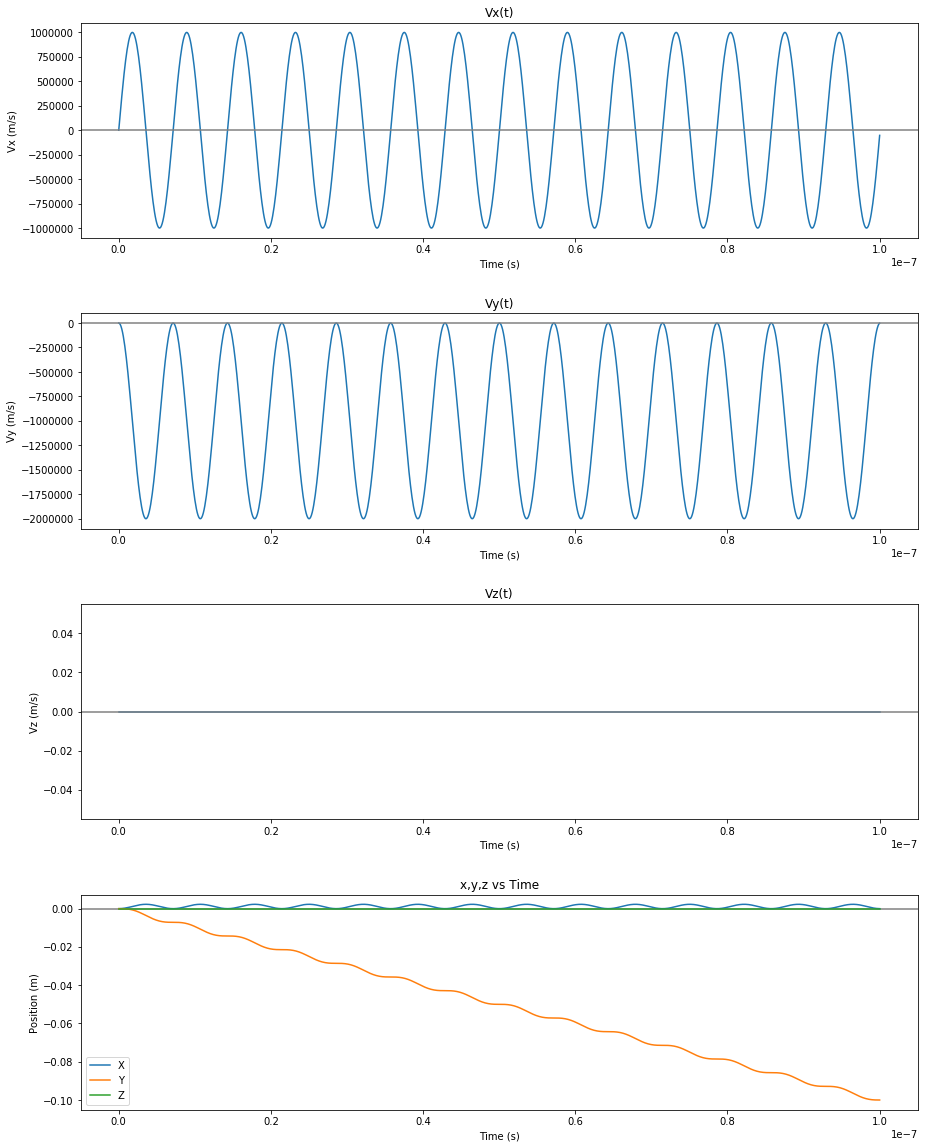

In [105]:
#QUESTION 7 SOLUTIONS
#Part (a)
def charged_particle(V,t):
    """
    Returns dydt for V (first-order ODE m*v' = q*(E + v*x*B))
    Where B = (0, 0, B_0), E = (E_x, 0, E_z), v = (v_x, v_y, v_z)
    """
    x,vx,y,vy,z,vz = V
    dydt = q/m * (E + np.cross((vx,vy,vz),B))
    return [vx,dydt[0],vy,dydt[1],vz,dydt[2]];

q, m, E, B = 1.6*10**-19, 9.1*10**-31, [5000,0,0], [0,0,0.005]

#Part (b)
freq = ((q*np.linalg.norm(B))/m)
print('The frequency of the cyclotron orbit is: ' + str(round(freq, 2)) + '. The magnitude of the drift is 25 and the direction of the drift is ' + str(np.cross(E,B)))

#Part (c)
t = np.linspace(0, 10**-7, 1000)
initial_conditions = [0,0,0,0,0,0]
electron = odeint(charged_particle, initial_conditions, t)

x,vx,y,vy,z,vz = np.hsplit(electron,6)
fig,ax = plt.subplots(4,1,False, figsize = (15,20))
plt.subplots_adjust(hspace=.35)
ax[0].plot(t,vx)
ax[1].plot(t,vy)
ax[2].plot(t,vz)
ax[0].axhline(0,color = 'gray'); ax[1].axhline(0,color = 'gray'); ax[2].axhline(0,color = 'gray'); ax[3].axhline(0,color = 'gray')
X=cumtrapz(vx)
Y=cumtrapz(vy)
ax[3].plot(Y,X)

#Part (d)
ax[3].plot(t,x, label = "X")
ax[3].plot(t,y, label = "Y")
ax[3].plot(t,z, label = "Z")

ax[0].set_xlabel("Time (s)"); ax[0].set_ylabel("Vx (m/s)"); ax[0].set_title("Vx(t)")
ax[1].set_xlabel("Time (s)"); ax[1].set_ylabel("Vy (m/s)"); ax[1].set_title("Vy(t)")
ax[2].set_xlabel("Time (s)"); ax[2].set_ylabel("Vz (m/s)"); ax[2].set_title("Vz(t)")
ax[3].set_title("x,y,z vs Time"); ax[3].set_xlabel("Time (s)"); ax[3].set_ylabel("Position (m)")
ax[3].legend()
plt.show()

###### 8. In a linear mass-spring network of two masses attached by springs, assume that none of the springs are stretched when the system is in equillibrium.  Consider the time-dependence of the positions of the two masses $x_1(t)$ and $x_2(t)$, which we define so as to be zero at their equillibrium positions. 

(a) Write the equations of motion for this coupled system (paper and pencil!) and find the solutions $x_1(t)$ and $x_2(t)$.

(b) Evaluate the time-dependent positions of the two masses for the special case where the central spring is much weaker than the springs on either side, and all of the initial velocities and positions are zero except for $x_1(0)=1$. Describe with words the motion of each mass and how they interact with eachother (start from initial conditions!). How would you describe the energy transfer between the two masses? (you could also calculate and plot it to see if your description matches with your math!) 

The left mass starts at (0,0) with 0 m/s velocity. The right mass starts at (1,0) with 0 m/s velocity.
This gives an initial velocity to the left mass, pointing right.
As a result, the middle spring transfers energy to the right mass, which moves it to the right as well.
As the left mass bounces off the spring, it will then transfer its momementum into the right mass (And vice versa as it goes the other way).
This is shown in the two graphs below.
The basic pattern is that one mass causes the other to go into simple harmonic motion, and then alternates such that the other mass goes into simple harmonic motion.
Additionally, as one mass gets a higher amplitude, the other decreases, and vice versa.


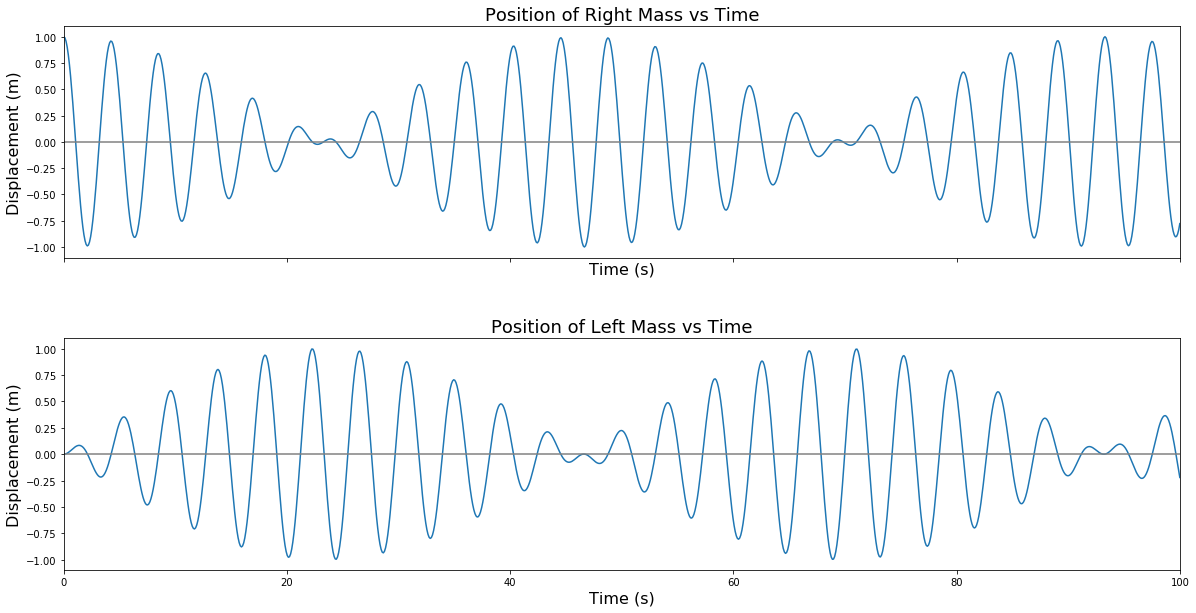

In [106]:
#QUESTION 8 SOLUTIONS
#Part (a) - On paper!
#Part (b)
k, k1 = 2, 0.2
def F(U,t):
    """
    U = [x1, v1, x2, v2]
    returns [x1', v1', x2', v2']
    """
    dx = [0,0,0,0]
    dx[0] = U[1]
    dx[1] = -k*U[0]+k1*(U[2]-U[0])
    dx[2] = U[3]
    dx[3] = -k1*(U[2] - U[0]) - k*U[2]
    return dx;

t = np.linspace(0,100,1000)
initial_conditions = (0,1,0,0)
v = odeint(F,initial_conditions,t)

fig,ax = plt.subplots(2,1,True,figsize=(20,10))
plt.subplots_adjust(hspace=.35)
ax[0].plot(t,v[:,1])
ax[1].plot(t,v[:,3])
plt.xlim(0,100)
#ax[2].plot(t,v[:,3])
ax[0].axhline(0,color = 'gray')
ax[1].axhline(0,color = 'gray')
ax[0].set_xlabel("Time (s)", size=16)
ax[0].set_ylabel("Displacement (m)", size=16)
ax[1].set_xlabel("Time (s)", size=16)
ax[1].set_ylabel("Displacement (m)", size=16)
ax[0].set_title("Position of Right Mass vs Time", size=18)
ax[1].set_title("Position of Left Mass vs Time", size=18)

print("The left mass starts at (0,0) with 0 m/s velocity. The right mass starts at (1,0) with 0 m/s velocity.")
print("This gives an initial velocity to the left mass, pointing right.")
print("As a result, the middle spring transfers energy to the right mass, which moves it to the right as well.")
print("As the left mass bounces off the spring, it will then transfer its momementum into the right mass (And vice versa as it goes the other way).")
print("This is shown in the two graphs below.")
print("The basic pattern is that one mass causes the other to go into simple harmonic motion, and then alternates such that the other mass goes into simple harmonic motion.")
print("Additionally, as one mass gets a higher amplitude, the other decreases, and vice versa.")

###### 9. In Introductory Physics you did the problem of a hard-hit baseball, but because you did it without air friction you were playing baseball on the moon. Let's play ball in a real atmosphere now. The air-friction drag on a baseball is approximately given by:

\begin{equation}
{\bf F}_{drag}= -1/2 C_d \rho_{air} \pi a^2 |v| {\bf v}	
\end{equation}

where $C_d$ is the drag coefficient, \rho_{air} is the density of air, $a$ is the radius of the ball, and $\bf v$ is the vector velocity of the ball. The absolute value pretty much guarantees that we won't find a formula for the solution of this problem, but that's fine since we know how to numerically solve differential equations now. Newton's second law now provides us with the equation of motion for the ball. Since this is a vector equation, it represents a whole system of equations, one for each dimension. To simplify our life, let's consider the motion to be just in the x-y plane with x as the horizontal direction. Using the definition of velocity, we can convert the equation into the following set of four coupled first-order equations:

\begin{equation}
\frac{dx}{dt} = v_x \,\,\,\,;\,\,\,\, \frac{dv_x}{dt} = \frac{-C_d \rho_{air} \pi a^2 v_x \sqrt{v_x^2+v_y^2}}{2m}
\end{equation}

\begin{equation}
\frac{dy}{dt} = v_y \,\,\,\,;\,\,\,\, \frac{dv_y}{dt} = \frac{-C_d \rho_{air} \pi a^2 v_y \sqrt{v_x^2+v_y^2}}{2m}
\end{equation}

(a) Use Python to solve this set of equations for a baseball with the following parameters: $C_d= 0.35$ ; $\rho_{air} = 1.2 kg/m^3$;  $a = 0.037$ m  ;  $m =$ 0.145 kg ;   $g$ = 9.8 $m/s^2$.

- Set the point of contact between bat and ball at the origin (x(0) = 0, y (0) = 0). Write your initial conditions in terms of the initial angle $\theta$ and velocity $v_0$ of the baseball so we can play with the angle and initial speed.

- Plot y(t) and x(t) for the initial conditions of $\theta = 45^o$ and $v_0$ = 60 m/s. Then plot the trajectory y(t) vs. x(t) in a parametric plot. 

- Once you have your plot for the trajectory in air working, overlay the trajectory that the ball would have experiences without air drag on the same plot. Estimate the difference in range caused by air friction.

(b) Power hitters say they would rather play in Coors Field in Denver than in sea-level stadiums because it is so much easier to hit home runs. Do they know what they are talking about? To find out, repeat part (a), but instead of overlaying the no air friction plot, overlay the trajectory of a ball hit in Denver and see if the ball goes significantly farther. The density of air in Denver is about 10% lower than it is at sea level.

(c) Set your initial speed to 47 m/s (105 mph) and vary the angle to find the maximum range you can get from your sea-level model. Physicists studying baseball say that backspin (which makes the ball float by deflecting air downward through the Bernoulli effect) is essential for record hits. One expert says that an initial speed of 47 m/s with optimal backspin gives a range of about 122 m (400 feet). Compare this value to the range you found (which doesn't include backspin). The amount you fell short shows the importance of backspin.

(d) Finally, to really see that the trajectory is not a parabola, use a very large initial velocity and observe that the ball finally comes down almost vertically. Explain why this is so by contrasting the x and y forces felt by the ball during flight.

The range with drag (air resistance) is 148.87472362642404 while the range without drag is 366.98841943581806
The difference in range cause by air friction is 218.11369580939402
Without backspin, the maximum range from theta = 38.57 degrees is a distance of 116.7 meters.
This maximum distance of 116.7 meters is 5.3 meters short of the maximum range with backspin (122 meters).
This shows the importance of backspin!
With a very large initial velocity, the ball finally comes down almost vertically.
This makes sense because the x forces propel the ball forward, with some air resistance.
The y forces are balanced with gravity and air resistance.


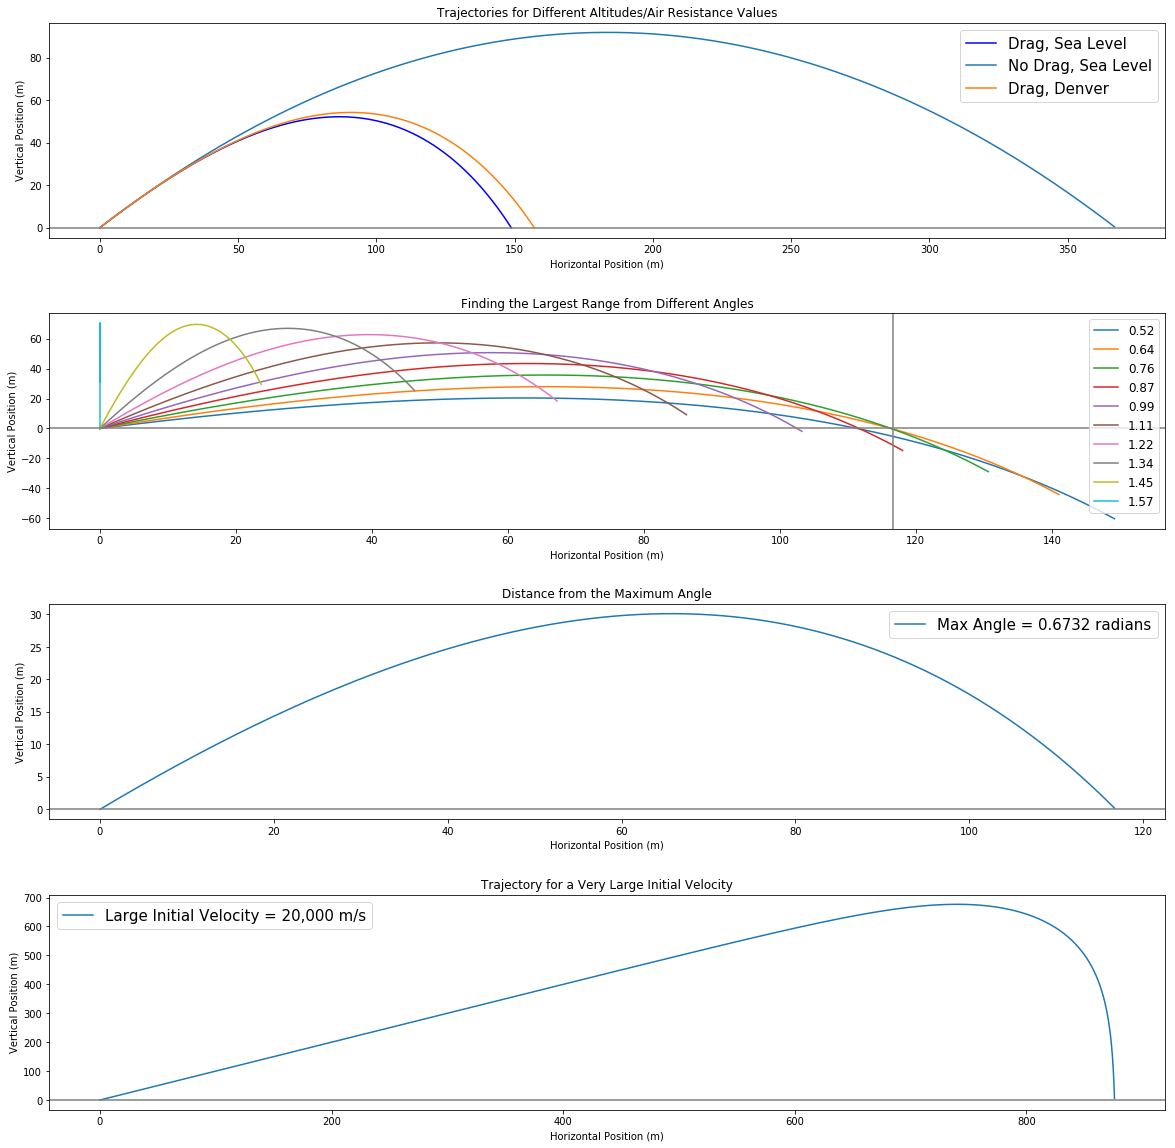

In [107]:
#QUESTION 9 SOLUTIONS
#Part (a)
#Components needed for plotting
fig,ax = plt.subplots(4,1,False,figsize=(20,20))
plt.subplots_adjust(hspace=.35)

def baseball(U,t):
    """
    Returns dxdy where dxdy is a list/array of four elements
    This is for four coupled first-order equations (for the motion of a baseball)
    """
    dxdy = [0,0,0,0]
    dxdy[0] = U[1]
    dxdy[1] = -(Cd*ro*np.pi*a**2*U[1]*np.sqrt(U[1]**2+U[3]**2))/(2*m)
    dxdy[2] = U[3]
    dxdy[3] = -(Cd*ro*np.pi*a**2*U[3]*np.sqrt(U[1]**2+U[3]**2))/(2*m) - g
    return dxdy;

#Trajectory in air (with drag)
Cd, ro, a, m, g, v0, theta = 0.35, 1.2, 0.037, 0.145, 9.8, 60, (np.pi/4)
initial_conditions = (0, v0*np.cos(theta), 0, v0*np.sin(theta))
t = np.linspace(0, 6.48, 1000)
v = odeint(baseball, initial_conditions, t)
ax[0].plot(v[:,0], v[:,2], color = 'b', label = 'Drag, Sea Level')

#Trajectory without drag
Cd, ro, a, m, g, v0, theta = 0, 1.2, 0.037, 0.145, 9.8, 60, (np.pi/4)
t1 = np.linspace(0, 8.65, 1000)
v_no_drag = odeint(baseball, initial_conditions, t1)
ax[0].plot(v_no_drag[:,0], v_no_drag[:,2], label = 'No Drag, Sea Level')

#Estimate the difference in range caused by air friction
range_drag = np.amax(v)
range_no_drag = np.amax(v_no_drag)
difference = range_no_drag - range_drag
print("The range with drag (air resistance) is", range_drag, "while the range without drag is", range_no_drag)
print("The difference in range cause by air friction is", difference)

#Part (b)
#Trajectory in Denver
Cd, ro, a, m, g, v0, theta = 0.35, 1.08, 0.037, 0.145, 9.8, 60, (np.pi/4)
t2 = np.linspace(0, 6.6, 1000)
v_denver = odeint(baseball, initial_conditions, t2)
ax[0].plot(v_denver[:,0], v_denver[:,2], label = 'Drag, Denver')

#Part(c)
#Calculate the maximum distance possible from angles
ro, v0, theta = 1.2, 47, np.linspace((np.pi/6),(np.pi/2),10)
for i in theta:
    initial_conditions_1 = (0,v0*np.cos(i),0,v0*np.sin(i))
    v_angle = odeint(baseball, initial_conditions_1 ,t)
    ax[1].plot(v_angle[:,0],v_angle[:,2], label = str(round(i,2)));
ax[1].legend(fontsize = '12')

#Trajectory for the max angle
Cd, ro, a, m, g, v0, theta = 0.35, 1.2, 0.037, 0.145, 9.8, 47, (0.673198)
t3 = np.linspace(0, 4.92, 1000)
initial_conditions_2 = (0, v0*np.cos(theta), 0, v0*np.sin(theta))
v_maxangle = odeint(baseball, initial_conditions_2, t3)
ax[2].plot(v_maxangle[:,0], v_maxangle[:,2], label = 'Max Angle = 0.6732 radians')

print("Without backspin, the maximum range from theta = 38.57 degrees is a distance of 116.7 meters.")
print("This maximum distance of 116.7 meters is 5.3 meters short of the maximum range with backspin (122 meters).")
print("This shows the importance of backspin!")

#Part (d)
#Trajectory with a very large initial velocity
ro, v0, theta = 1.2, 20000, (np.pi/4)
t4 = np.linspace(0, 25, 5000)
initial_conditions_3 = (0, v0*np.cos(theta), 0, v0*np.sin(theta))
v_high = odeint(baseball, initial_conditions_3, t4)
ax[3].plot(v_high[:,0], v_high[:,2], label = 'Large Initial Velocity = 20,000 m/s')

print("With a very large initial velocity, the ball finally comes down almost vertically.")
print("This makes sense because the x forces propel the ball forward, with some air resistance.")
print("The y forces are balanced with gravity and air resistance.")

#Format the data
ax[0].axhline(0,color = 'gray')
ax[1].axhline(0, color = 'gray')
ax[1].axvline(116.7, color = 'gray')
ax[2].axhline(0,color = 'gray')
ax[3].axhline(0,color = 'gray')

ax[0].legend(fontsize = '15')
ax[2].legend(fontsize = '15')
ax[3].legend(fontsize = '15')

ax[0].set_xlabel("Horizontal Position (m)")
ax[0].set_ylabel("Vertical Position (m)")
ax[1].set_xlabel("Horizontal Position (m)")
ax[1].set_ylabel("Vertical Position (m)")
ax[2].set_xlabel("Horizontal Position (m)")
ax[2].set_ylabel("Vertical Position (m)")
ax[3].set_xlabel("Horizontal Position (m)")
ax[3].set_ylabel("Vertical Position (m)")

ax[0].set_title("Trajectories for Different Altitudes/Air Resistance Values")
ax[1].set_title("Finding the Largest Range from Different Angles")
ax[2].set_title("Distance from the Maximum Angle")
ax[3].set_title("Trajectory for a Very Large Initial Velocity")

plt.show()